# 🌲🌲 Random Forest 🌲🌲

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

It is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.

## Picture speaks better than words 🤓

Below is the simple ilustration of how a Random forest works 

![title](rf.png)

## Import the requried libraries ⤵️

In [3]:
# to read the data and manipulate the data
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
# from prettytable import PrettyTable

# for statistical analysis
import scipy.stats as ss
from scipy.optimize import minimize

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read the dataset using pandas 
df = pd.read_csv('amzn_fama3_new.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,1/3/2018,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,0.59,-0.39,-0.22,0.005,1189.010010,0.012775
1,1/4/2018,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,0.42,-0.26,0.24,0.005,1204.199951,0.004476
2,1/5/2018,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,0.66,-0.35,-0.26,0.005,1209.589966,0.016163
3,1/8/2018,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,0.19,-0.16,0.06,0.005,1229.140015,0.014425
4,1/9/2018,1259.329956,1241.760010,1256.900024,1252.699951,3661300,1252.699951,0.15,-0.34,-0.04,0.005,1246.869995,0.004676


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          501 non-null    object 
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Open          501 non-null    float64
 4   Close         501 non-null    float64
 5   Volume        501 non-null    int64  
 6   Adj Close     501 non-null    float64
 7   MktRF         501 non-null    float64
 8   SMB           501 non-null    float64
 9   HML           501 non-null    float64
 10  RF            501 non-null    float64
 11  Yest_Close    501 non-null    float64
 12  stock_return  501 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 51.0+ KB


### Date Column is of type *object*. We need to convert it to type *datetime64[ns]*. You'll later figure out why! 🤔

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          501 non-null    datetime64[ns]
 1   High          501 non-null    float64       
 2   Low           501 non-null    float64       
 3   Open          501 non-null    float64       
 4   Close         501 non-null    float64       
 5   Volume        501 non-null    int64         
 6   Adj Close     501 non-null    float64       
 7   MktRF         501 non-null    float64       
 8   SMB           501 non-null    float64       
 9   HML           501 non-null    float64       
 10  RF            501 non-null    float64       
 11  Yest_Close    501 non-null    float64       
 12  stock_return  501 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 51.0 KB


In [7]:
# Typical_Price is the mean value of High, Low and Close cols
df['Typical_Price'] = df[['High','Low','Close']].mean(axis=1)
df['Typical_Price_returns'] = (np.log(df.Typical_Price) - np.log(df.Typical_Price.shift(1))) * 100.
df['Volume_returns'] = (np.log(df.Volume) - np.log(df.Volume.shift(1))) * 100.
df

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return,Typical_Price,Typical_Price_returns,Volume_returns
0,2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,0.59,-0.39,-0.22,0.005,1189.010010,0.012775,1199.329997,NaN,NaN
1,2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,0.42,-0.26,0.24,0.005,1204.199951,0.004476,1210.039998,0.889035,-2.828485
2,2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,0.66,-0.35,-0.26,0.005,1209.589966,0.016163,1222.760010,1.045719,15.950158
3,2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,0.19,-0.16,0.06,0.005,1229.140015,0.014425,1243.993327,1.721602,18.838265
4,2018-01-09,1259.329956,1241.760010,1256.900024,1252.699951,3661300,1252.699951,0.15,-0.34,-0.04,0.005,1246.869995,0.004676,1251.263306,0.582706,-15.601790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2019-12-23,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000,0.10,0.21,-0.30,0.007,1786.500000,0.003638,1790.170003,-0.026249,-88.002987
497,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007,1793.000000,-0.002114,1790.786621,0.034439,-88.547936
498,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007,1789.209961,0.044467,1846.243327,3.049796,191.901625
499,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007,1868.770020,0.000551,1879.070028,1.762405,2.972660


In [8]:
# read the ads_vintage file from the directory using pandas
ads_vintage = pd.read_excel("ads_vintages-zip.xlsx")
ads_vintage.head()

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_091520,ADS_Index_091720,ADS_Index_092420,ADS_Index_093020,ADS_Index_100120,ADS_Index_100220,ADS_Index_100820,ADS_Index_101520,ADS_Index_101620,ADS_Index_102220
0,1960-03-01,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


We need the Date and the ADS_Index_010920 columns of the data. 

In [9]:
ads_vintage_clean = ads_vintage.loc[:,['Date','ADS_Index_010920']]
ads_vintage_clean.head()

,Date,ADS_Index_010920
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532


In [10]:
ads_vintage_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22221 entries, 0 to 22220
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              22221 non-null  datetime64[ns]
 1   ADS_Index_010920  21859 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 347.3 KB


### Now we can merge the two datasets on Date column as they're now of same datatype.  💡

In [11]:
df = pd.merge(df, ads_vintage_clean, on='Date')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return,Typical_Price,Typical_Price_returns,Volume_returns,ADS_Index_010920
0,2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,0.59,-0.39,-0.22,0.005,1189.010010,0.012775,1199.329997,NaN,NaN,-0.114576
1,2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,0.42,-0.26,0.24,0.005,1204.199951,0.004476,1210.039998,0.889035,-2.828485,-0.127697
2,2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,0.66,-0.35,-0.26,0.005,1209.589966,0.016163,1222.760010,1.045719,15.950158,-0.139508
3,2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,0.19,-0.16,0.06,0.005,1229.140015,0.014425,1243.993327,1.721602,18.838265,-0.167099
4,2018-01-09,1259.329956,1241.760010,1256.900024,1252.699951,3661300,1252.699951,0.15,-0.34,-0.04,0.005,1246.869995,0.004676,1251.263306,0.582706,-15.601790,-0.174452


# 1. Autoregressive Model

An autoregressive (AR) model predicts future behavior based on past behavior. It's used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. 

In [12]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [13]:
X_ar = df[['Typical_Price','Volume']].to_numpy()[1:]
X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
Y_ar = df[['Open']].to_numpy()[:-1]

# fitting the model
y_hat_1 = ar1.fit(X_ar,Y_ar)

# 2.Fama French Model

In [14]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
        #rmse = np.sqrt(np.mean((Y-y_hat)**2))
        #ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

SMB stands for "Small [market capitalization] Minus Big" and HML for "High [book-to-market ratio] Minus Low" MktRF stands for "Market Risk Factor"

In [15]:
X_FF = df[['MktRF','SMB','HML','ADS_Index_010920']].to_numpy()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['Open']].to_numpy()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

# 3. Moving Average Model 📈📉

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

In [16]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [17]:
X_EMA = df[['Typical_Price_returns','Volume_returns']].to_numpy()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['Open']].to_numpy()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

# 4. Random Forest 🌲🌲🌲🌲

In [20]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['Open'][-(N-(T+1)):].values
    Y_close = df['Close'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price','Volume']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price','Volume']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['MktRF','SMB','HML','ADS_Index_010920']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['MktRF','SMB','HML','ADS_Index_010920']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    
    y_hat_ma = np.zeros(N-(T+1))
    #df['ema'] = df.Typical_Price.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price_returns','Volume_returns']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price_returns','Volume_returns']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)
    
    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.8, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close

17.111423358181284
124.99597735202119
104.77839684875941
ar1_RMSE:  17.111423358181284
ma_RMSE:  104.77839684875941
FF_RMSE:  124.99597735202119
random forest rmse:  15.41040136596879


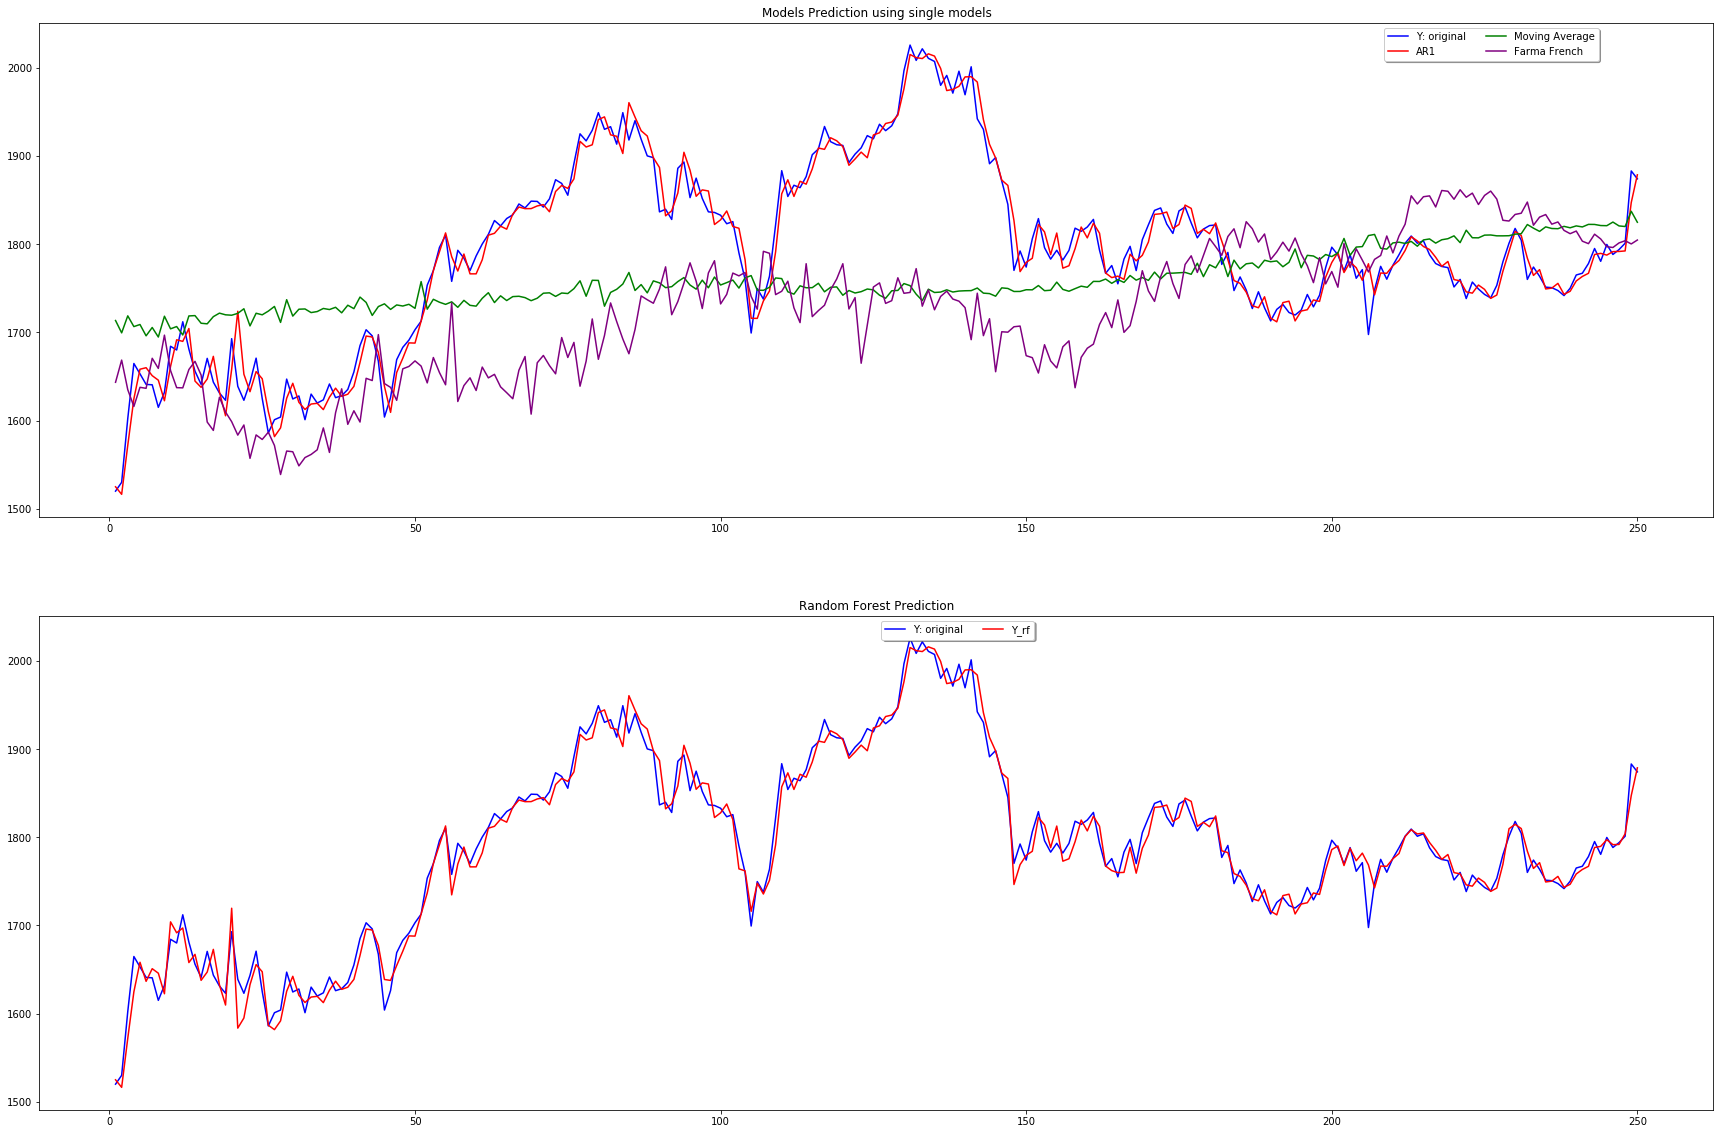

In [21]:
Y_rf,Y, Y_close = Randomforest()

In [22]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [23]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])
final_results.head()

,Y,Y_rf,Y_close
0,1520.010010,1524.949833,1500.280029
1,1530.000000,1516.412440,1575.390015
2,1602.310059,1571.936993,1629.510010
3,1664.689941,1624.723042,1656.579956
4,1652.979980,1658.195009,1659.420044


In [24]:
final_results.head()

,Y,Y_rf,Y_close
0,1520.010010,1524.949833,1500.280029
1,1530.000000,1516.412440,1575.390015
2,1602.310059,1571.936993,1629.510010
3,1664.689941,1624.723042,1656.579956
4,1652.979980,1658.195009,1659.420044


In [25]:
final_results = final_results.reindex()

In [26]:
final_results

,Y,Y_rf,Y_close
0,1520.010010,1524.949833,1500.280029
1,1530.000000,1516.412440,1575.390015
2,1602.310059,1571.936993,1629.510010
3,1664.689941,1624.723042,1656.579956
4,1652.979980,1658.195009,1659.420044
...,...,...,...
245,1788.260010,1791.488294,1793.000000
246,1793.810059,1791.696327,1789.209961
247,1801.010010,1803.845828,1868.770020
248,1882.920044,1847.111292,1869.800049
